In [25]:
import numpy as np
import pandas as pd
import seaborn as sn

In [3]:
df = pd.read_excel("regression_data.xls", engine="xlrd")

In [4]:
df.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000


In [5]:
df2 = df.assign(lat_cut = pd.cut(df.lat, 5, labels=list('12345')), long_cut = pd.cut(df.long, 5, labels=list('abcde')))

In [6]:
df2.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,lat_cut,long_cut
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,3,b
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,5,a


In [7]:
pd.Categorical(df2.filter(regex='_cut').apply(tuple, axis=1))

[(3, b), (5, a), (5, b), (3, a), (4, b), ..., (5, a), (3, a), (4, a), (4, b), (4, a)]
Length: 21597
Categories (20, object): [(1, a), (1, b), (1, c), (1, d), ..., (5, a), (5, b), (5, c), (5, e)]

In [8]:
df3 = df2.assign(cartesian = pd.Categorical(df2.filter(regex='_cut').apply(tuple, axis=1)))

In [9]:
df3.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,lat_cut,long_cut,cartesian
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,3,b,"(3, b)"
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,5,a,"(5, a)"


In [10]:
df3.cartesian

0        (3, b)
1        (5, a)
2        (5, b)
3        (3, a)
4        (4, b)
          ...  
21592    (5, a)
21593    (3, a)
21594    (4, a)
21595    (4, b)
21596    (4, a)
Name: cartesian, Length: 21597, dtype: category
Categories (20, object): [(1, a), (1, b), (1, c), (1, d), ..., (5, a), (5, b), (5, c), (5, e)]

In [16]:
df3.drop('id', axis=1, inplace=True)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226783CF3C8>,
      dtype=object)

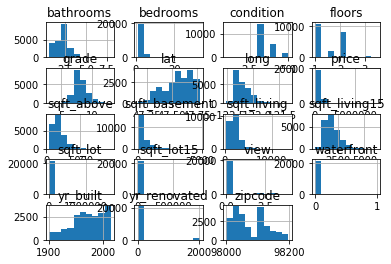

In [28]:
df3.hist()